# Batch Effects Graphs Description

This Jupyter Notebook makes all of the PCA plots showing the relationship between histologies and batch. 

This script works best with Jupyter Notebook Code Folding and Collapsable Header Extensions Added. To run this you will need to download the R Kernal. You can do that by typing the following into the command line:

```conda install -c r r-irkernel```

Go to this [link](https://forums.fast.ai/t/useful-jupyter-notebook-tips-plugins-collapsible-sections/17919) to learn how to enable collapsable headers.

To export this file as an HTML with collapsable headers type the following into the command line

```jupyter nbconvert --template=collapsible_headings --to html_ch "graph-generator.ipynb"```

# Library Import & Data Download

#### Import the necessary libararies 

In [1]:
library(tibble)
library(tidyr)
library(ggplot2)
library(readr)
library(dplyr)
library(BatchQC)
library(forcats)
library(sva)
library(rprojroot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: mgcv

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-33. For overview type 'help("mgcv-package")'.

Loading required package: genefilter


Attaching package: ‘genefilter’


The following object is masked from ‘package:readr’:

    spec


Loading required package: BiocParallel



####  Configure file paths & import functions

In [2]:
# Configure file paths
root_dir = find_root(has_file("OpenPBTA-analysis.Rproj"))
analysis_dir = file.path(root_dir, "analyses", "batch-effects")
data_dir = file.path(root_dir, "data")
functions = file.path(analysis_dir, "util", "functions.R")

In [3]:
# Load functions from /util/function.R
source(functions)

#### Download the Data

In [4]:
# Download all covariate data which will be used to identify batches
covariate_file = file.path(data_dir, "pbta-histologies.tsv")
covariate = read_tsv(covariate_file, col_types = cols(molecular_subtype = "c"))

In [5]:
# Download gene expression data
dat_rsem_polya_file = file.path(data_dir, "pbta-gene-expression-rsem-tpm.polya.rds")
dat_rsem_polya = readRDS(dat_rsem_polya_file)

dat_rsem_stranded_file = file.path(data_dir, "pbta-gene-expression-rsem-tpm.stranded.rds")
dat_rsem_stranded = readRDS(dat_rsem_stranded_file)

dat_kallisto_stranded_file = file.path(data_dir, "pbta-gene-expression-kallisto.stranded.rds")
dat_kallisto_stranded <- readRDS(dat_kallisto_stranded_file)
dat_kallisto_stranded = dat_kallisto_stranded[,2:ncol(dat_kallisto_stranded)]

dat_kallisto_polya_file = file.path(data_dir, "pbta-gene-expression-kallisto.polya.rds")
dat_kallisto_polya <- readRDS(dat_kallisto_polya_file)

##### Shorten the data files if you don't have a strong enough computer 

***This should not be run for a full analysis!***

In [6]:
# Shorten Data Files
dat_rsem_polya = shorten(dat_rsem_polya)
dat_rsem_stranded = shorten(dat_rsem_stranded)
dat_kallisto_stranded = shorten(dat_kallisto_stranded)
dat_kallisto_polya = shorten(dat_kallisto_polya)

#### Group the Kallisto Data

In [7]:
# Summarize the kallisto data on the gene level in order to join with batch
dat_kallisto_polya = grouper(dat_kallisto_polya)
dat_kallisto_stranded = grouper(dat_kallisto_stranded)

# Sequence Center Batch effects

### Part 1: ***Rsem-tpm Files***

#### Part 1.1: Rsem-Polya

##### Prepare Data

In [8]:
id_batch_histology = make_id_batch_histology(covariate, "seq_center")

In [9]:
my_rsem_polya_plots = make_histology_pca_plots(dat_rsem_polya, 
                                               id_batch_histology, 
                                               gene_id = dat_rsem_polya$gene_id, 
                                               report_name = "rsem_polya_sequence",
                                               "pbta-gene-expression-rsem-tpm-combat-seq-center.polya.rds")

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(starting_col)` instead of `starting_col` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



[1] "DATA IS READY"


Saving 7 x 7 in image



[1] 0


Found2batches

Adjusting for0covariate(s) or covariate level(s)



Standardizing Data across genes


Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Saving 7 x 7 in image



##### Graph before adjusting for batch effects

[[1]]


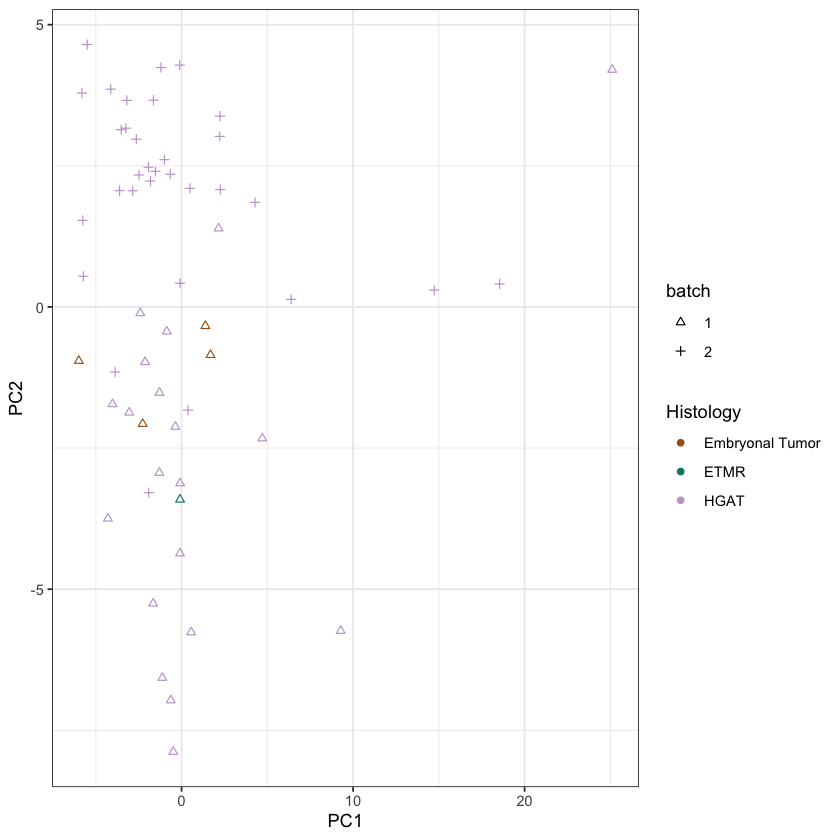

In [10]:
my_rsem_polya_plots[1]

- File = "pbta-gene-expression-rsem-tpm.polya.rds"
- Batch = sequence center
- Conclusion: **There are batch effects**. On a small scale analysis, you can see that batch 1 groups around the **top left corner** while batch 2 groups in the **bottom left corner**.

##### Show batch effects after adjustment via [combat](https://rdrr.io/bioc/sva/man/ComBat.html)

[[1]]


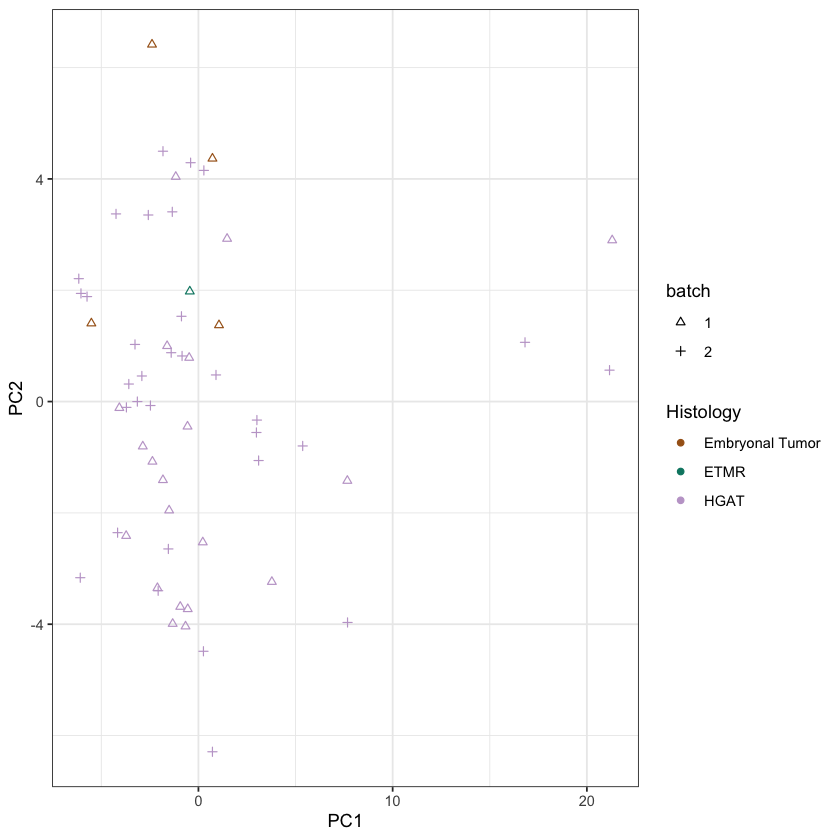

In [11]:
my_rsem_polya_plots[2]

- Batch effects are now no longer present because batches one and two seem to be evenly distributed


#### Part 1.2:  Rsem-Stranded

##### Prepare Data 

In [12]:
my_rsem_stranded_plots = make_histology_pca_plots(dat_rsem_stranded, id_batch_histology, gene_id = dat_rsem_stranded$gene_id, report_name = "rsem_stranded_sequence", "pbta-gene-expression-rsem-tpm-combat-seq-center.stranded.rds")

[1] "DATA IS READY"


Saving 7 x 7 in image



[1] 0


Found2batches

Adjusting for0covariate(s) or covariate level(s)



Standardizing Data across genes


Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Saving 7 x 7 in image



##### Graph before adjusting for batch effects

[[1]]


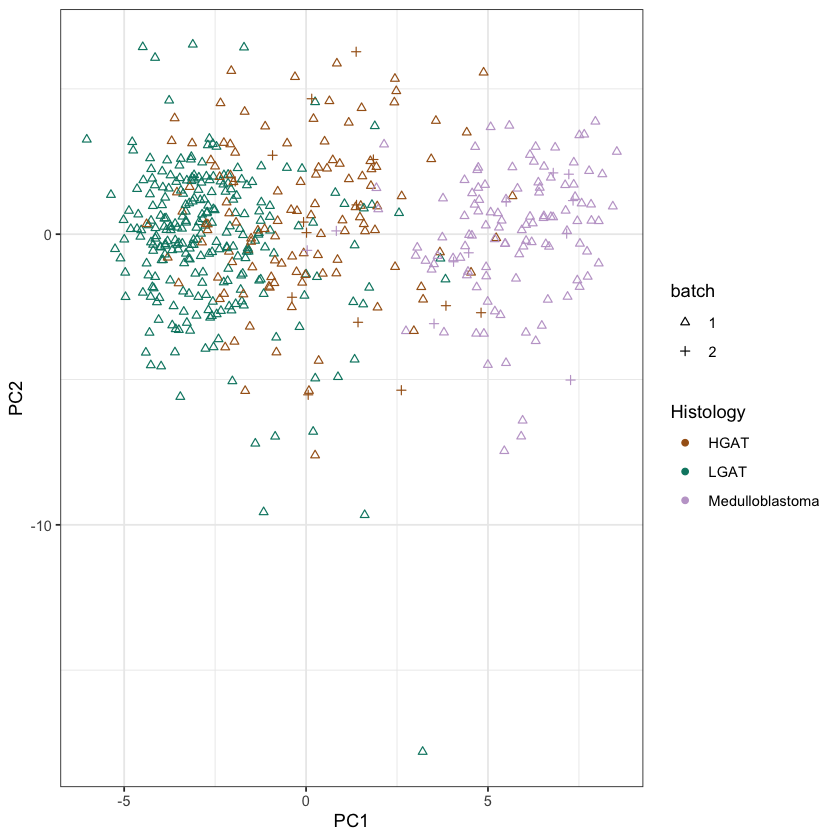

In [13]:
my_rsem_stranded_plots[1]

- File = "pbta-gene-expression-rsem-tpm.stranded.rds"
- Batch = sequence center
- Conclusion: **Cannot determine** from this image if there are batch effects. BatchQC is required (see script for batch-sequence-effects.R). Visually it appears that there are none.

##### Show batch effects after adjustment via [combat](https://rdrr.io/bioc/sva/man/ComBat.html)

[[1]]


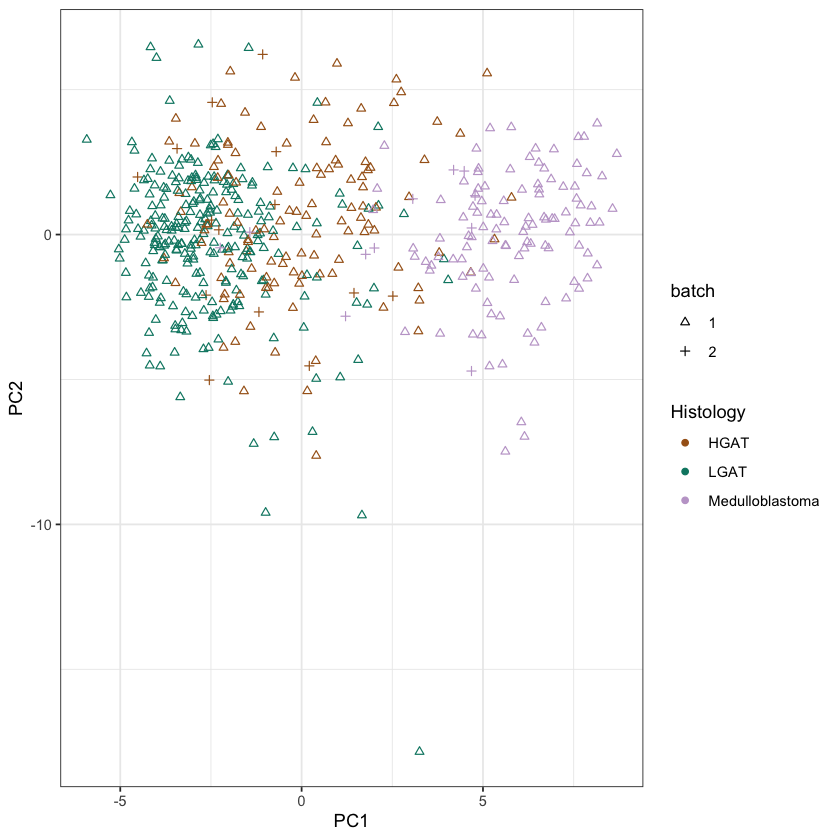

In [14]:
my_rsem_stranded_plots[2]

- No significant changes made to histologies, Batch one doesn't focus as much on the top right quadrant. This batch correction may not be necessary though.

### Part 2: ***Kallisto Files***

#### Part 2.1: Kallisto Polya

##### Prepare Data

In [15]:
my_kallisto_polya_plots = make_histology_pca_plots(dat_kallisto_polya, id_batch_histology, gene_id = dat_kallisto_polya$gene_id, report_name = "kallisto_polya_sequence", "pbta-gene-expression-kallisto-combat-seq-center.polya.rds")

[1] "DATA IS READY"


Saving 7 x 7 in image



[1] 0


Found2batches

Adjusting for0covariate(s) or covariate level(s)



Standardizing Data across genes


Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Saving 7 x 7 in image



##### Graph before adjusting for batch effects

[[1]]


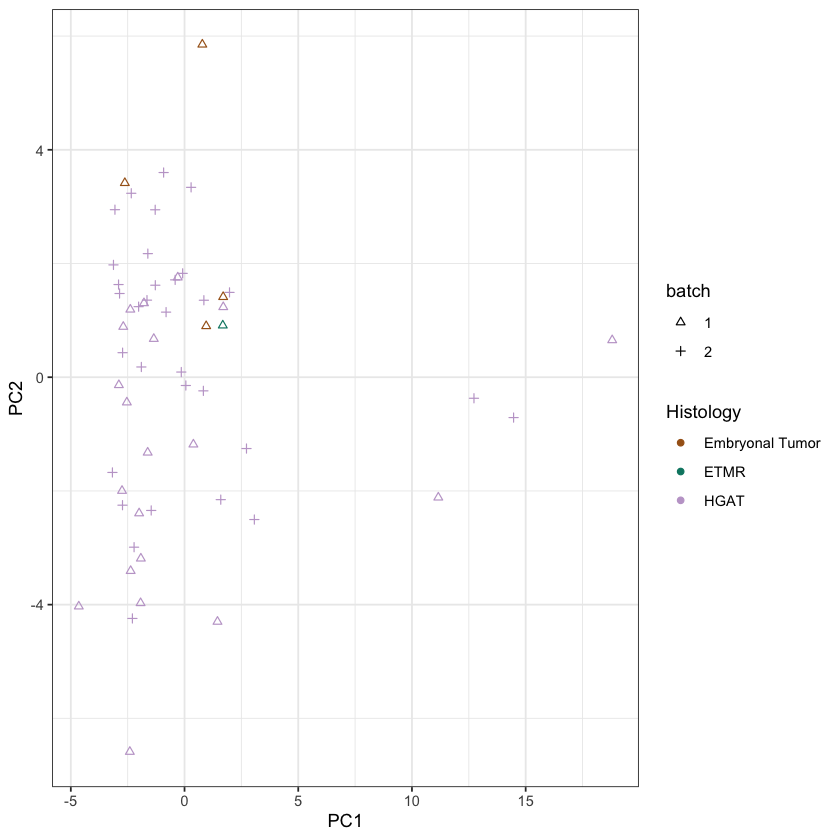

In [16]:
my_kallisto_polya_plots[1]

- File = "pbta-gene-expression-kallisto.polya.rds"
- Batch = sequence center
- Conclusion: **Cannot determine** from this image if there are batch effects. BatchQC is required (see script for batch-sequence-effects.R). Visually it appears that there are none.

##### Show batch effects after adjustment via [combat](https://rdrr.io/bioc/sva/man/ComBat.html)

[[1]]


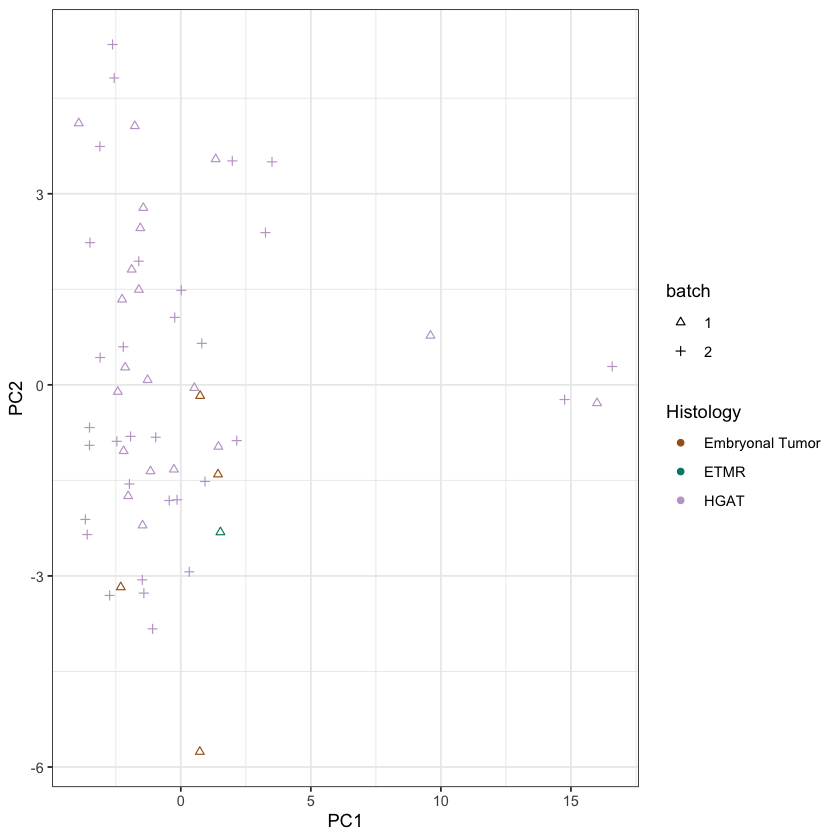

In [17]:
my_kallisto_polya_plots[2]

- Batch correction seems unecessary for this file. The changes doesn't seem particularly useful.

#### Part 2.2: Kallisto Stranded

##### Prepare Data

In [18]:
my_kallisto_standed_plots = make_histology_pca_plots(dat_kallisto_stranded, id_batch_histology, gene_id = dat_kallisto_stranded$gene_id, report_name = "kallisto_stranded_sequence", "pbta-gene-expression-kallisto-combat-seq-center.stranded.rds")

[1] "DATA IS READY"


Saving 7 x 7 in image



[1] 0


Found2batches

Adjusting for0covariate(s) or covariate level(s)



Standardizing Data across genes


Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Saving 7 x 7 in image



##### Graph before adjusting for batch effects

[[1]]


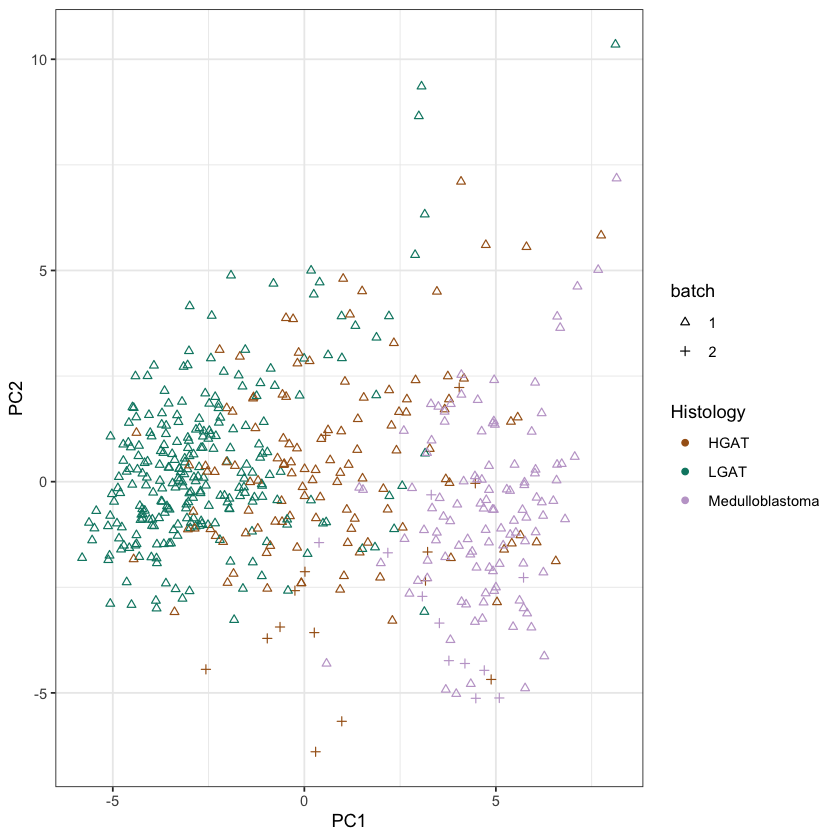

In [19]:

my_kallisto_standed_plots[1]

- File = "pbta-gene-expression-kallisto.stranded.rds"
- Batch = sequence center
- Conlusion: There appears to be batch effects. Batch 2 tends to group around the bottom of the graph

##### Show batch effects after adjustment via [combat](https://rdrr.io/bioc/sva/man/ComBat.html)

[[1]]


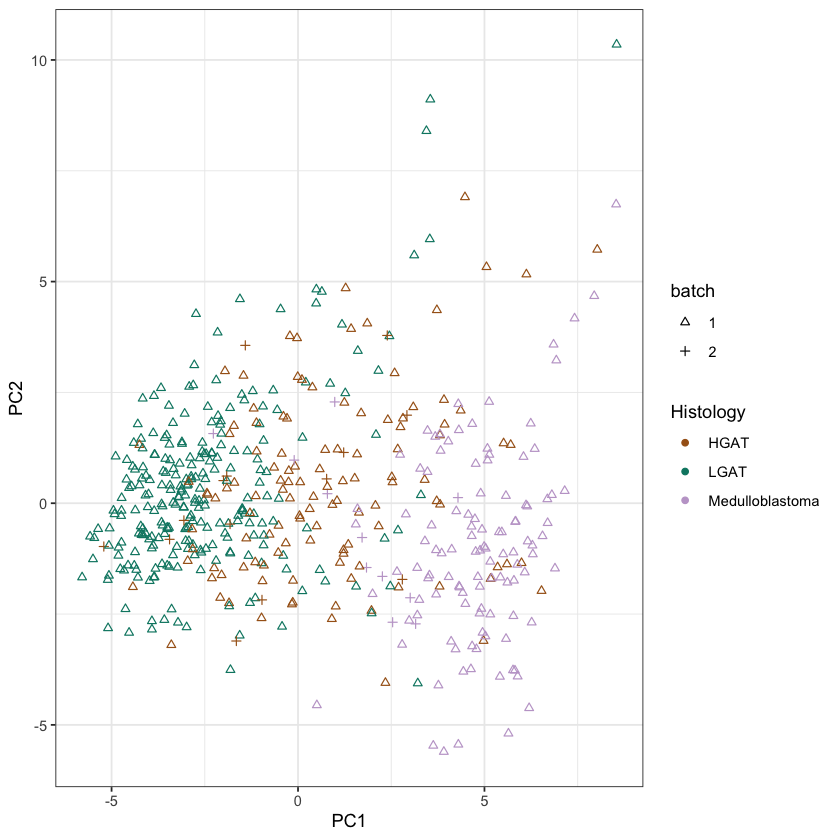

In [20]:
my_kallisto_standed_plots[2]

- Batch Effects no longer present because batches one and two seem to be evenly distributed

# Cohort Batch effects

### Part 1: ***Rsem-tpm Files***

#### Part 1.1: Rsem-Polya

##### Prepare Data

In [21]:
id_batch_histology = make_id_batch_histology(covariate, "cohort")

In [22]:
my_rsem_polya_plots = make_histology_pca_plots(dat_rsem_polya, 
                                               id_batch_histology, 
                                               gene_id = dat_rsem_polya$gene_id, 
                                               report_name = "rsem_polya_cohort",
                                               "pbta-gene-expression-rsem-tpm-combat-cohort.polya.rds")

[1] "DATA IS READY"


Saving 7 x 7 in image



[1] 0


Found2batches

Adjusting for0covariate(s) or covariate level(s)



Standardizing Data across genes


Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Saving 7 x 7 in image



##### Graph before adjusting for batch effects

[[1]]


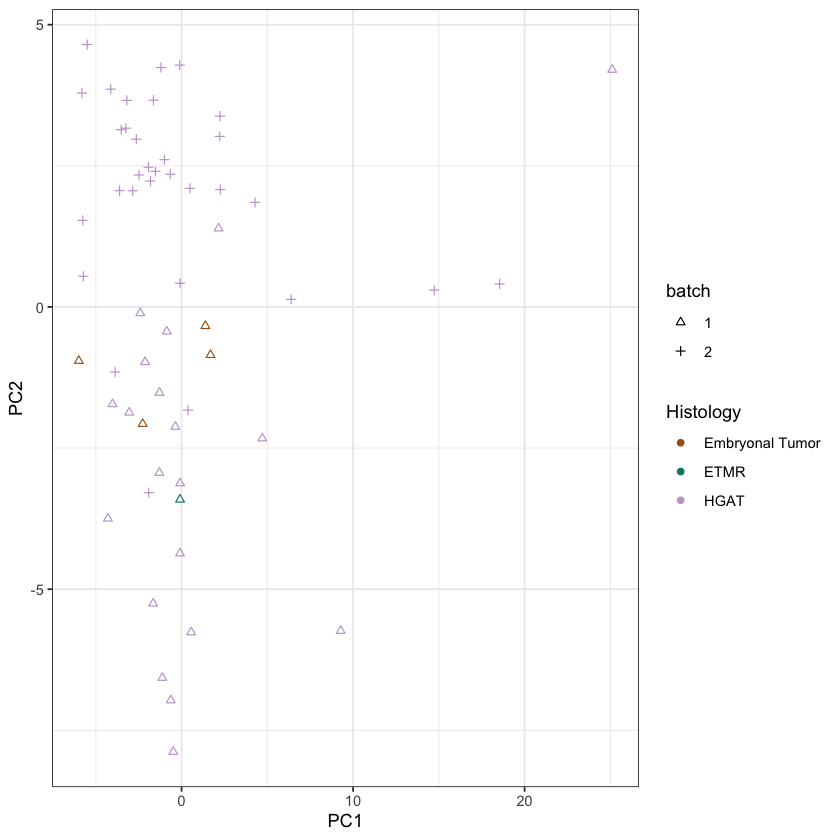

In [23]:
my_rsem_polya_plots[1]

- File = "pbta-gene-expression-rsem-tpm.polya.rds"
- Batch = sequence center
- Conclusion: There are batch effects. You can see that batch 1 groups around the top left corner while batch two groups in the bottom left corner
- ***NOTE***: For this gene expression file, there are only 59 patients. As such, the batches cohort and sequence center overlap perfectly. Therefore, one cannot remove the batch effects of one without removing the batch effects of the other

##### Show batch effects after adjustment via [combat](https://rdrr.io/bioc/sva/man/ComBat.html)

[[1]]


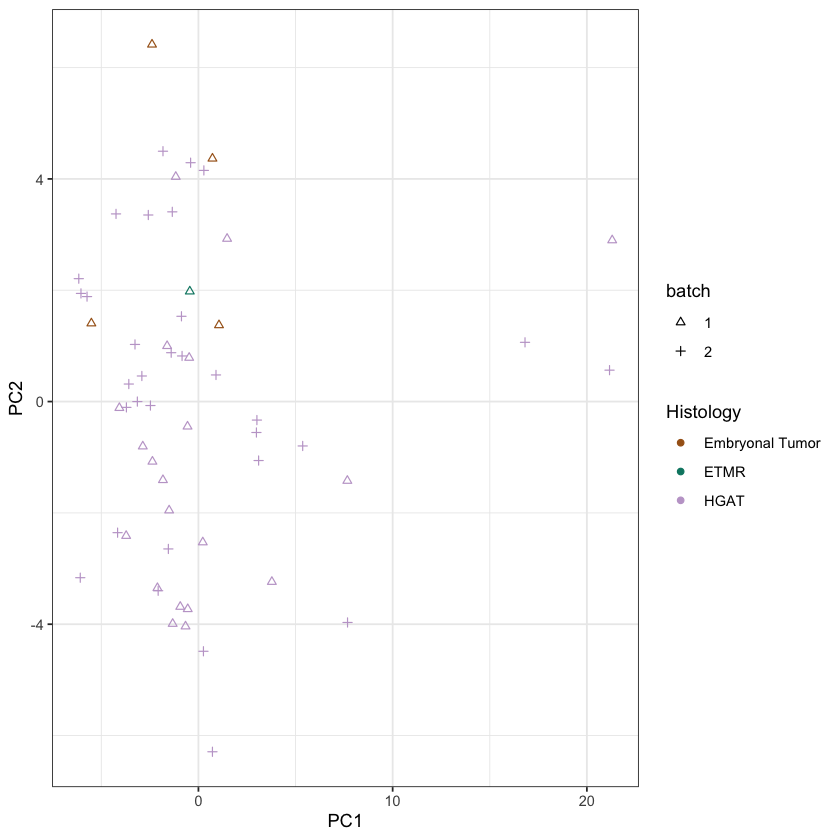

In [24]:
my_rsem_polya_plots[2]

- Batch Effects no longer present


#### Part 1.2:  Rsem-Stranded

##### Prepare Data (there is only one batch so this shouldn't work)

In [25]:
my_rsem_stranded_plots_temp = make_histology_pca_plots(dat_rsem_stranded, id_batch_histology, gene_id = dat_rsem_stranded$gene_id, report_name = "rsem_stranded_cohort", "pbta-gene-expression-rsem-tpm-combat-cohort.stranded.rds")

[1] "DATA IS READY"


Saving 7 x 7 in image



[1] 0


ComBat failed! It's likely that you are trying to adjust for batches with just 1 batch



***NOTE***: because there is only one cohort batch in the file above, an error message should have popped up showing that ComBat failed to run

##### Graph before adjusting for batch effects

[[1]]


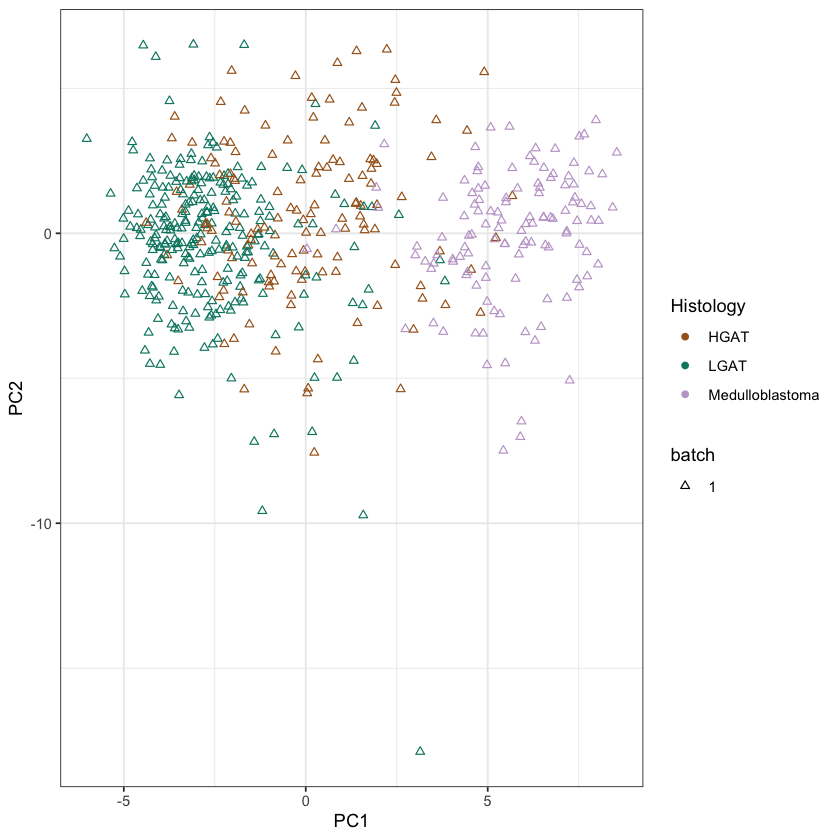

In [26]:
my_rsem_stranded_plots_temp[1]

- File = "pbta-gene-expression-rsem-tpm.stranded.rds"
- Batch = Cohort
- Conclusion: No batch effects.

##### Show batch effects after adjustment via [combat](https://rdrr.io/bioc/sva/man/ComBat.html)

In [27]:
my_rsem_stranded_plots_temp[2]

[[1]]
NULL

- No graph to show

### Part 2: ***Kallisto Files***

#### Part 2.1: Kallisto Polya

##### Prepare Data

In [28]:
my_kallisto_polya_plots = make_histology_pca_plots(dat_kallisto_polya, id_batch_histology, gene_id = dat_kallisto_polya$gene_id, report_name = "kallisto_polya_cohort", "pbta-gene-expression-kallisto-combat-cohort.polya.rds")

[1] "DATA IS READY"


Saving 7 x 7 in image



[1] 0


Found2batches

Adjusting for0covariate(s) or covariate level(s)



Standardizing Data across genes


Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Saving 7 x 7 in image



##### Graph before adjusting for batch effects

[[1]]


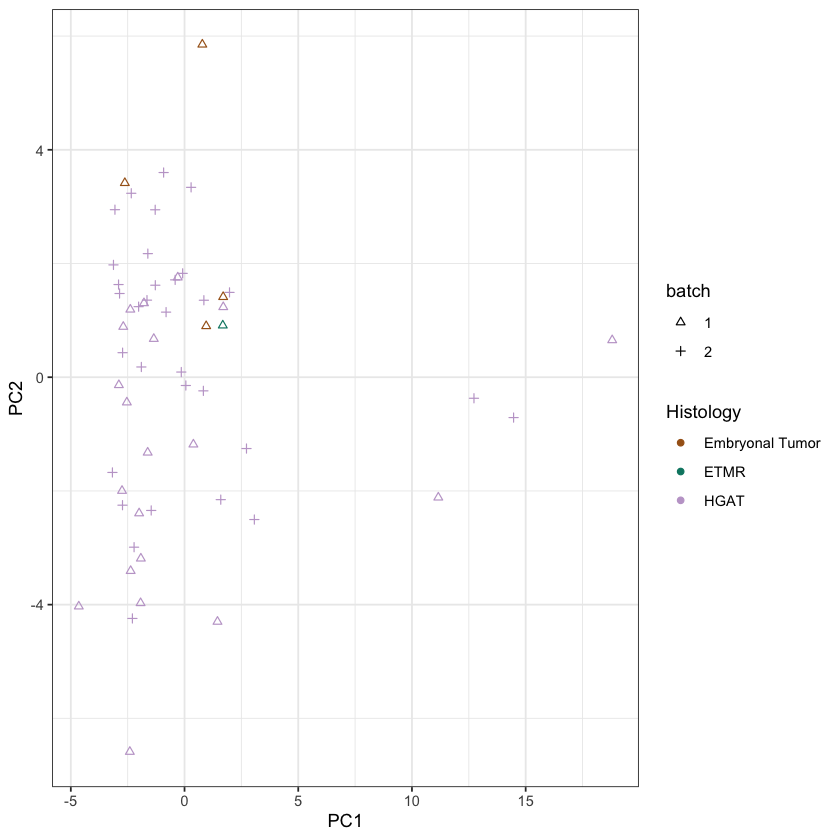

In [29]:
my_kallisto_polya_plots[1]

- File = "pbta-gene-expression-kallisto.polya.rds"
- Batch = cohort
- Conclusion: **Cannot determine** from this image if there are batch effects. BatchQC is required (see script for batch-sequence-effects.R). Visually it appears that there are none.
- ***NOTE***: Batches cohort and sequence center completely overlap

##### Show batch effects after adjustment via [combat](https://rdrr.io/bioc/sva/man/ComBat.html)

[[1]]


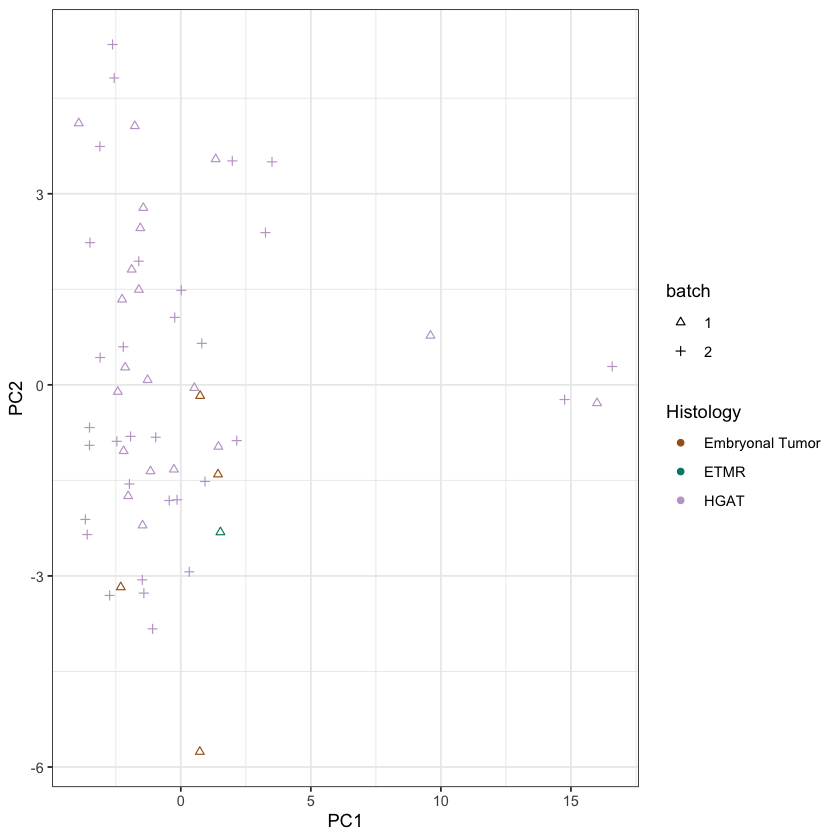

In [30]:
my_kallisto_polya_plots[2]

- Batch correction seems unecessary for this file. The changes doesn't seem particularly useful.

#### Part 2.2: Kallisto Stranded

##### Prepare Data

In [31]:
my_kallisto_standed_plots = make_histology_pca_plots(dat_kallisto_stranded, id_batch_histology, gene_id = dat_kallisto_stranded$gene_id, report_name = "kallisto_stranded_cohort", "pbta-gene-expression-kallisto-combat-cohort.stranded.rds")

[1] "DATA IS READY"


Saving 7 x 7 in image



[1] 0


ComBat failed! It's likely that you are trying to adjust for batches with just 1 batch



##### Graph before adjusting for batch effects

[[1]]


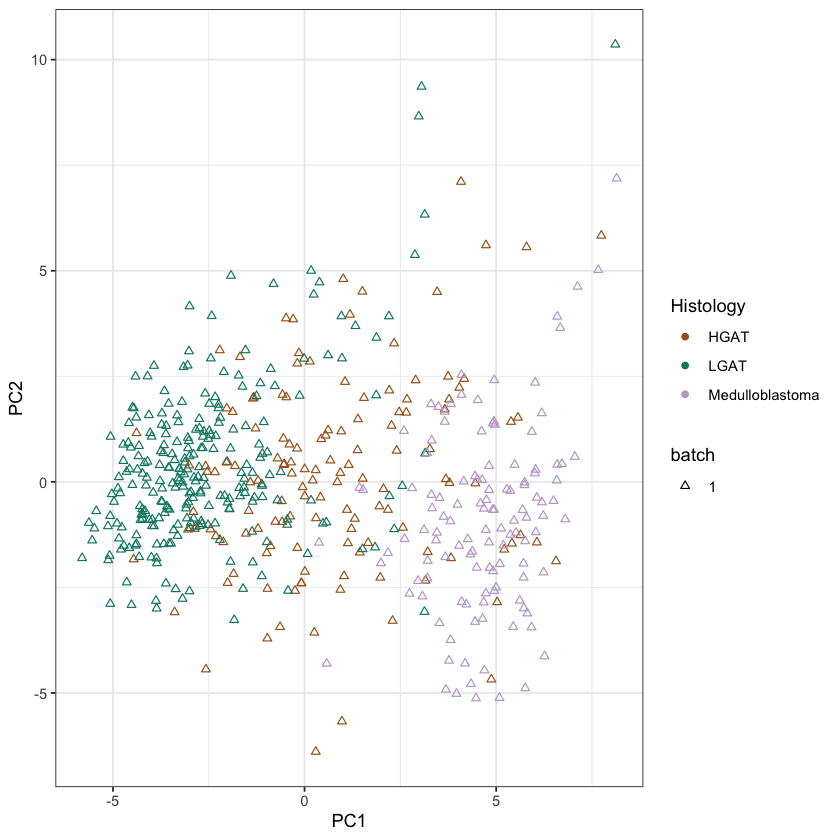

In [32]:

my_kallisto_standed_plots[1]

- Only one Batch

##### Show batch effects after adjustment via [combat](https://rdrr.io/bioc/sva/man/ComBat.html)

In [33]:
my_kallisto_standed_plots[2]

[[1]]
NULL

- There was only one batch so it doesn't make sense to adjust for batch effects

# Method (polyA vs stranded) Batch effects

### Part 1: ***Rsem Files***

##### Prepare Data

In [34]:
id_histology = cbind("Kids_First_Biospecimen_ID" = covariate$Kids_First_Biospecimen_ID, "histology" = covariate$short_histology)
colnames(id_histology) <- c("Kids_First_Biospecimen_ID", "histology")
id_histology = as_tibble(id_histology)

In [35]:
my_rsem_plots = make_histology_pca_plots_methods(dat_rsem_polya, dat_rsem_stranded, id_histology, report_name = "rsem_method")

Joining, by = c("Kids_First_Biospecimen_ID", "ENSG00000000003.14_TSPAN6", "ENSG00000000005.5_TNMD", "ENSG00000000419.12_DPM1", "ENSG00000000457.13_SCYL3", "ENSG00000000460.16_C1orf112", "ENSG00000000938.12_FGR", "ENSG00000000971.15_CFH", "ENSG00000001036.13_FUCA2", "ENSG00000001084.10_GCLC", "ENSG00000001167.14_NFYA", "ENSG00000001460.17_STPG1", "ENSG00000001461.16_NIPAL3", "ENSG00000001497.16_LAS1L", "ENSG00000001561.6_ENPP4", "ENSG00000001617.11_SEMA3F", "ENSG00000001626.14_CFTR", "ENSG00000001629.9_ANKIB1", "ENSG00000001630.15_CYP51A1", "ENSG00000001631.15_KRIT1", "ENSG00000002016.17_RAD52", "ENSG00000002079.14_MYH16", "ENSG00000002330.13_BAD", "ENSG00000002549.12_LAP3", "ENSG00000002586.18_CD99", "ENSG00000002586.18_PAR_Y_CD99", "ENSG00000002587.9_HS3ST1", "ENSG00000002726.20_AOC1", "ENSG00000002745.12_WNT16", "ENSG00000002746.14_HECW1", "ENSG00000002822.15_MAD1L1", "ENSG00000002834.17_LASP1", "ENSG00000002919.14_SNX11", "ENSG00000002933.7_TMEM176A", "ENSG00000003056.7_M6PR", "ENSG

[1] 1095  103
[1] 564 103
[1] "DATA IS READY"


Saving 7 x 7 in image



[1] 0


Found2batches

Adjusting for0covariate(s) or covariate level(s)



Standardizing Data across genes


Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Saving 7 x 7 in image



##### Graph before adjusting for batch effects

[[1]]


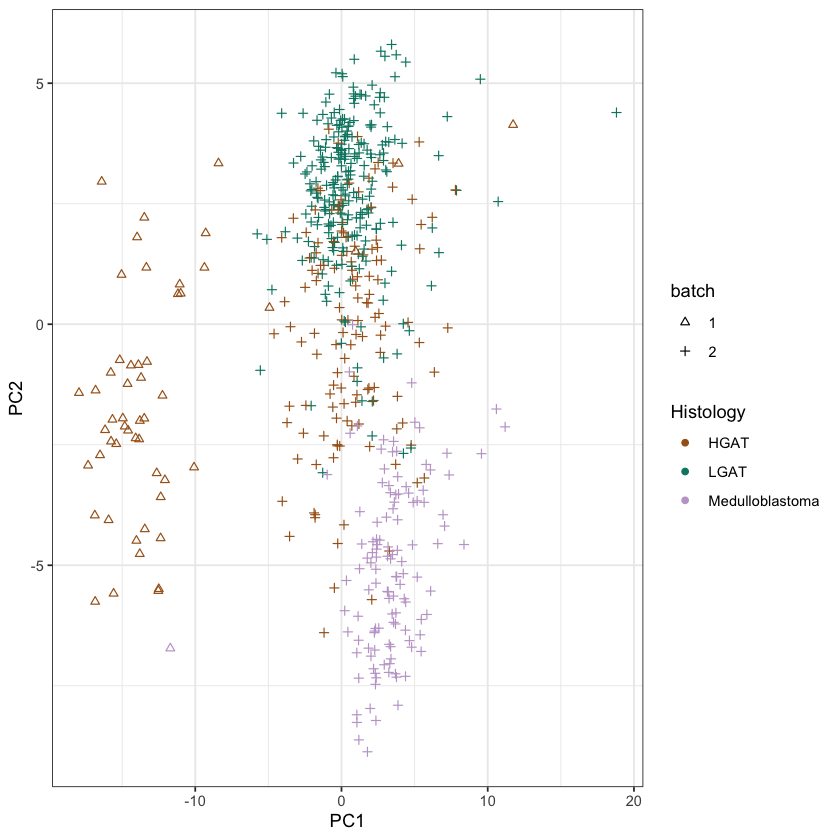

In [36]:
my_rsem_plots[1]

- Files = "pbta-gene-expression-rsem-tpm.polya.rds", "pbta-gene-expression-rsem-tpm.stranded.rds"
- Batch = sequence center
- Conclusion: There are batch effects. You can see that batch 1 groups around the top left corner while batch two groups in the bottom left corner

##### Show batch effects after adjustment via [combat](https://rdrr.io/bioc/sva/man/ComBat.html)

[[1]]


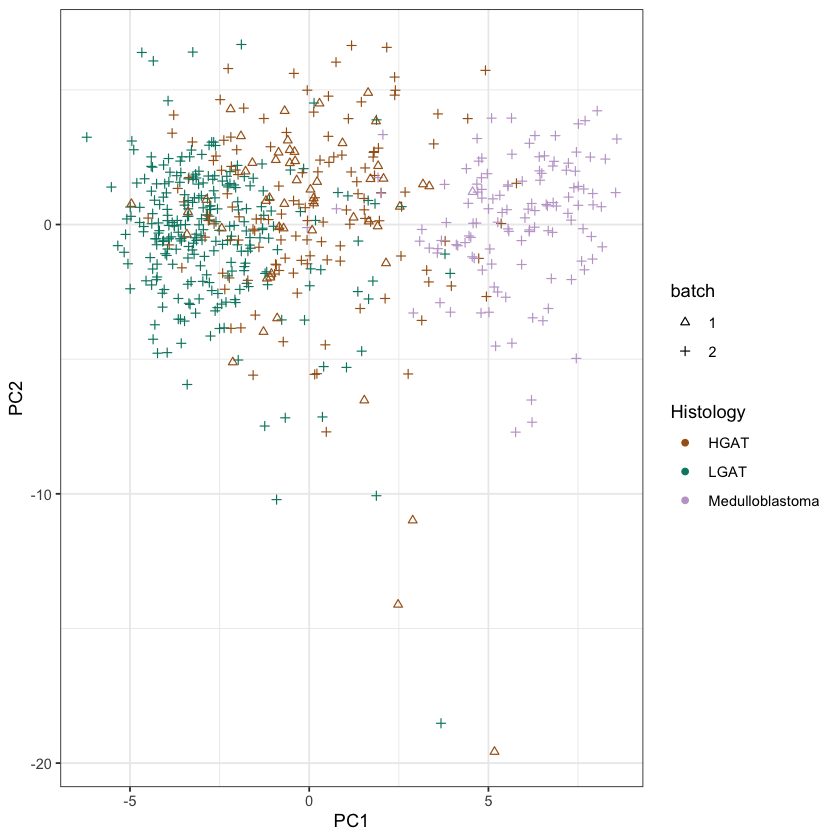

In [37]:
my_rsem_plots[2]

- Batch Effects no longer present
- You can still see the difference in histologies though. However, HGAT and LGAT show more overlap than they did previously


### Part 2: ***Stranded Files***

#### Part 2.1: Kallisto Polya

##### Prepare Data

In [38]:
my_kallisto_plots = make_histology_pca_plots_methods(dat_kallisto_polya, dat_kallisto_stranded, id_histology, report_name = "kallisto_method")

Joining, by = c("Kids_First_Biospecimen_ID", "ENSG00000001036.13_FUCA2", "ENSG00000001460.17_STPG1", "ENSG00000001461.16_NIPAL3", "ENSG00000001617.11_SEMA3F", "ENSG00000001626.14_CFTR", "ENSG00000001630.15_CYP51A1", "ENSG00000002587.9_HS3ST1", "ENSG00000002933.7_TMEM176A", "ENSG00000003056.7_M6PR", "ENSG00000003137.8_CYP26B1", "ENSG00000003249.13_DBNDD1", "ENSG00000003509.15_NDUFAF7", "ENSG00000003989.17_SLC7A2", "ENSG00000004059.10_ARF5", "ENSG00000004478.7_FKBP4", "ENSG00000004776.12_HSPB6", "ENSG00000004777.18_ARHGAP33", "ENSG00000004779.9_NDUFAB1", "ENSG00000004799.7_PDK4", "ENSG00000004975.11_DVL2", "ENSG00000005073.5_HOXA11", "ENSG00000005175.9_RPAP3", "ENSG00000005486.16_RHBDD2", "ENSG00000005801.16_ZNF195", "ENSG00000005882.11_PDK2", "ENSG00000005884.17_ITGA3", "ENSG00000006025.11_OSBPL7", "ENSG00000006047.12_YBX2", "ENSG00000006059.3_KRT33A", "ENSG00000006116.3_CACNG3", "ENSG00000006118.14_TMEM132A", "ENSG00000006210.6_CX3CL1", "ENSG00000006282.20_SPATA20", "ENSG00000006451.7_

[1] 1095  103
[1] 563 103
[1] "DATA IS READY"


Saving 7 x 7 in image



[1] 0


Found2batches

Adjusting for0covariate(s) or covariate level(s)



Standardizing Data across genes


Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Saving 7 x 7 in image



##### Graph before adjusting for batch effects

[[1]]


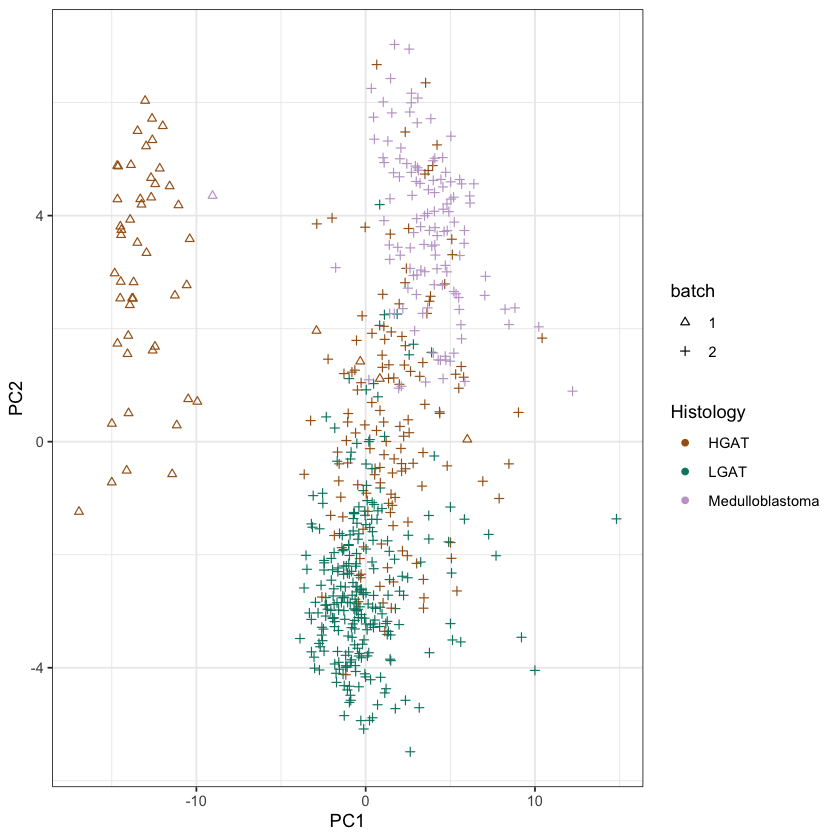

In [39]:
my_kallisto_plots[1]

- Files = "pbta-gene-expression-kallisto-tpm.polya.rds", "pbta-gene-expression-kallisto-tpm.stranded.rds"
- Batch = sequence center
- Conclusion: There are batch effects. You can see that batch 1 groups around the top left corner while batch two groups in the bottom left corner

##### Show batch effects after adjustment via [combat](https://rdrr.io/bioc/sva/man/ComBat.html)

[[1]]


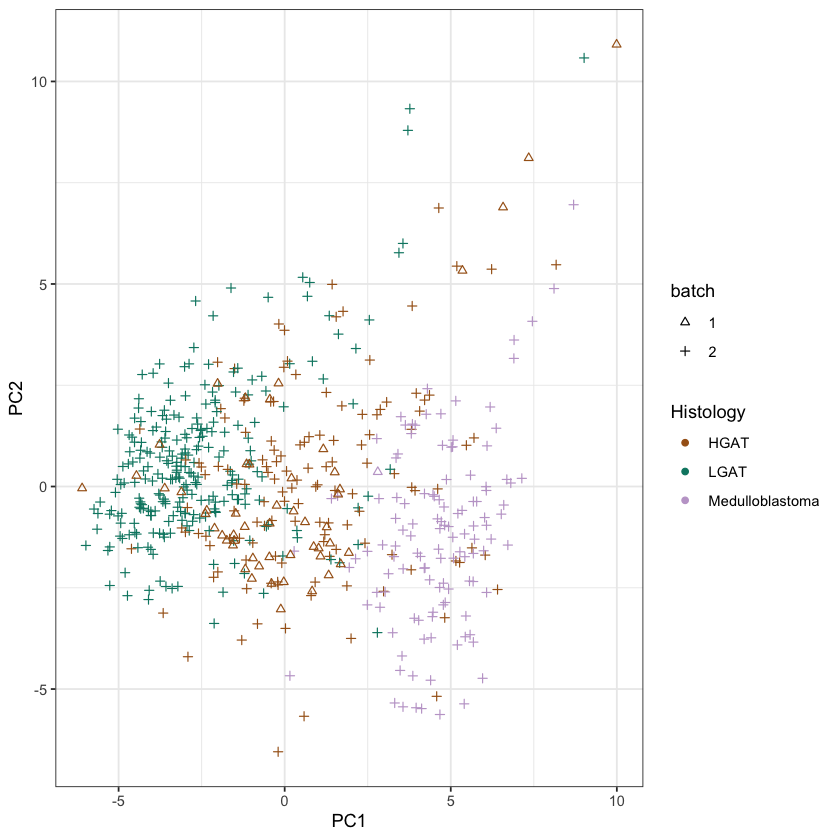

In [40]:
my_kallisto_plots[2]

- Batch Effects no longer present
- You can still see the difference in histologies though. However, HGAT and LGAT show more overlap than they did previously

